<a href="https://colab.research.google.com/github/hyperkraz/MAT421/blob/main/HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW10**

***Problem 4***

In [45]:
import numpy as np

def my_num_int(f, a, b, n, option):
  h = (b - a) / (n - 1)
  x = np.linspace(a, b, n)
  f = f(x)
  if option == 'trap':
    T = (h/2) * (f[0] + 2 * sum(f[1:n - 1]) + f[n - 1])
    return T
  elif option == 'rect':
    R = h * sum(f[1::])
    return R
  elif option == 'simp':
    S = (h / 3) * (f[0] + 2 * sum(f[:n - 2:2]) + 4 * sum(f[1:n - 1:2]) + f[n - 1])
    return S




f = lambda x: x**2
print('for x^2:')
print(my_num_int(f, 0, 1, 3, 'rect'))
print(my_num_int(f, 0, 1, 3, 'trap'))
print(my_num_int(f, 0, 1, 3, 'simp'))

print('\n')
   
f = lambda x: np.exp(x**2)
print('for e^(x^2):')
print(my_num_int(f, -1, 1, 101, 'simp'))
print(my_num_int(f, -1, 1, 10001, 'simp'))
print(my_num_int(f, -1, 1, 100001, 'simp'))


for x^2:
0.625
0.375
0.3333333333333333


for e^(x^2):
2.961547346105437
2.9256659293914926
2.9253397355720656


***Problem 5***

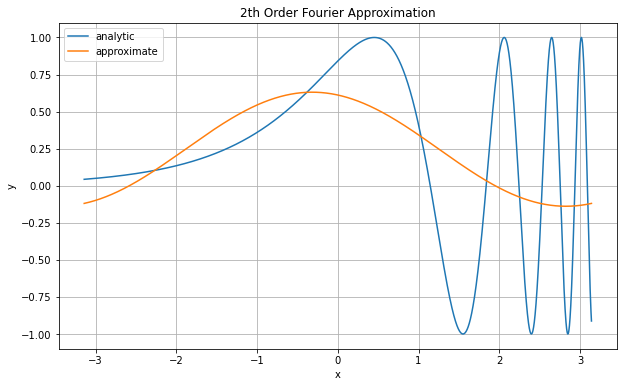

In [46]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

def my_fourier_coef(f, n):
  def cos(x):
    return np.cos(n * x) * f(x)
  def sin(x):
    return np.sin(n * x) * f(x)
  A_n = quad(cos, -np.pi, np.pi)[0]
  B_n = quad(sin, -np.pi, np.pi)[0]
  return [A_n / np.pi, B_n / np.pi]


def plot_results(f, N):
   x = np.linspace(-np.pi, np.pi, 10000)
   [A0, B0] = my_fourier_coef(f, 0)
   y = A0*np.ones(len(x))/2
   for n in range(1, N):
       [An, Bn] = my_fourier_coef(f, n)
       y += An*np.cos(n*x)+Bn*np.sin(n*x)
   plt.figure(figsize = (10,6))
   plt.plot(x, f(x), label = 'analytic')
   plt.plot(x, y, label = 'approximate')
   plt.xlabel('x')
   plt.ylabel('y')
   plt.grid()
   plt.legend()
   plt.title(f'{N}th Order Fourier Approximation')
   plt.show()
  
f = lambda x: np.sin(np.exp(x))
N = 2
plot_results(f, N)



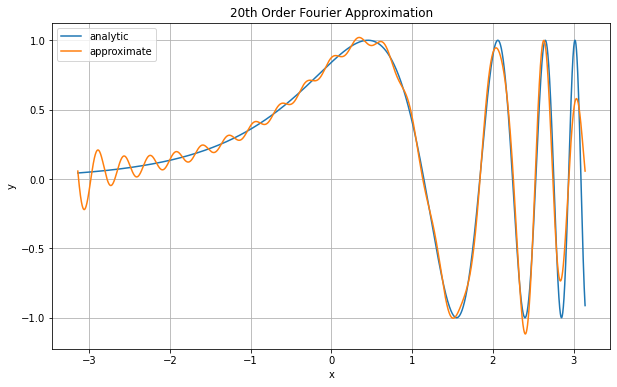

In [47]:
N = 20
plot_results(f, N)

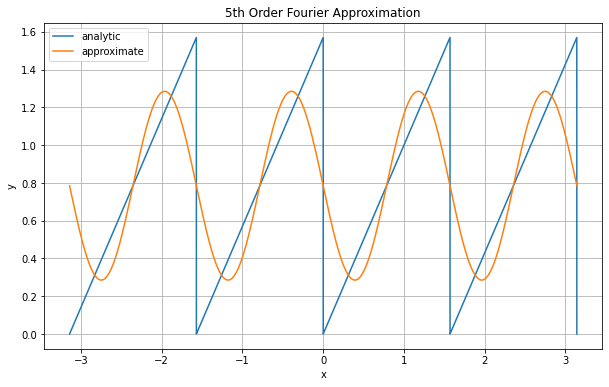

In [48]:
f = lambda x: np.mod(x, np.pi/2)
N = 5
plot_results(f, N)

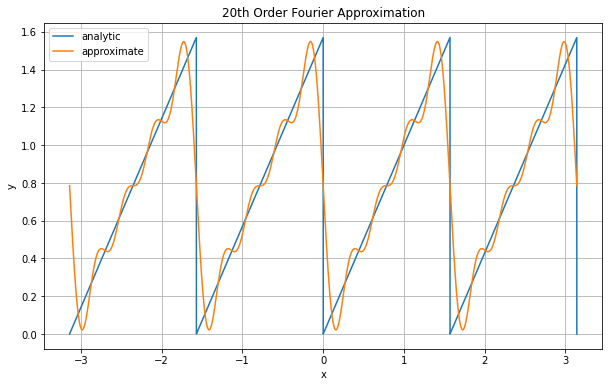

In [49]:
N = 20
plot_results(f, N)

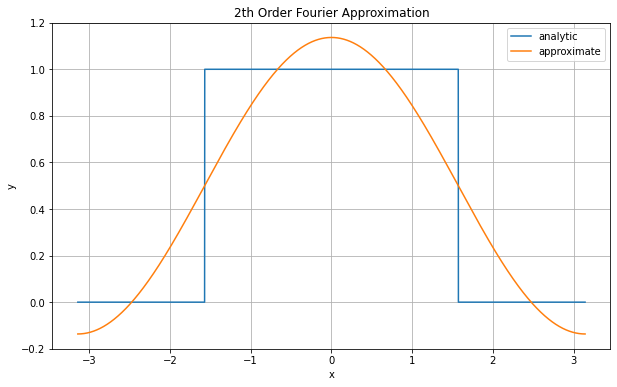

In [50]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 2
plot_results(f, N)

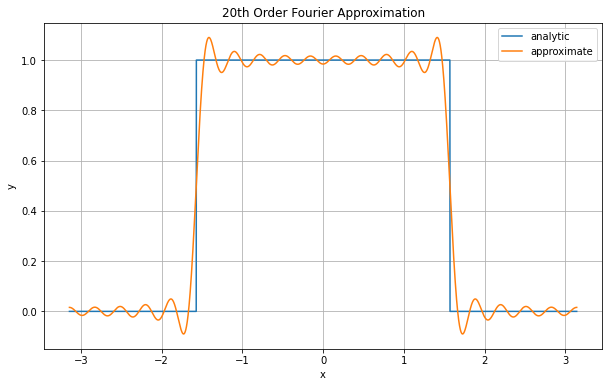

In [51]:
N = 20
plot_results(f, N)